source: 
* https://binance-docs.github.io/apidocs/spot/en/#general-info
* https://github.com/binance/binance-api-postman
* https://python-binance.readthedocs.io/en/latest/overview.html  # pip install python-binance
* https://binance-connector.readthedocs.io/en/latest/ # pip install binance-connector

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import asyncio
from keys import api_key, api_secret
from binance.client import Client
from datetime import datetime

In [6]:
client = Client(api_key, api_secret, testnet=True)

for Asynchronous client

In [ ]:
async def main():

    # initialise the client
    client = await AsyncClient.create(api_key, api_secret)

if __name__ == "__main__":

    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())

In [7]:
client.get_account_status()

{'data': 'Normal'}

In [8]:
client.testnet

True

In [15]:
client = Client(api_key, api_secret, testnet=False)
client.get_account()

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'updateTime': 1666237496927,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.06233240', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00253444', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.51049846', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '7

In [18]:
# get all symbol prices
client.get_all_tickers()

[{'symbol': 'ETHBTC', 'price': '0.06730300'},
 {'symbol': 'LTCBTC', 'price': '0.00267400'},
 {'symbol': 'BNBBTC', 'price': '0.01401500'},
 {'symbol': 'NEOBTC', 'price': '0.00040200'},
 {'symbol': 'QTUMETH', 'price': '0.00200500'},
 {'symbol': 'EOSETH', 'price': '0.00080300'},
 {'symbol': 'SNTETH', 'price': '0.00002101'},
 {'symbol': 'BNTETH', 'price': '0.00032200'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00011280'},
 {'symbol': 'BNBETH', 'price': '0.20820000'},
 {'symbol': 'BTCUSDT', 'price': '19016.83000000'},
 {'symbol': 'ETHUSDT', 'price': '1279.72000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001434'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

# Binance Constants 

KLINE_INTERVAL_1MINUTE = '1m'
KLINE_INTERVAL_3MINUTE = '3m'
KLINE_INTERVAL_5MINUTE = '5m'
KLINE_INTERVAL_15MINUTE = '15m'
KLINE_INTERVAL_30MINUTE = '30m'
KLINE_INTERVAL_1HOUR = '1h'
KLINE_INTERVAL_2HOUR = '2h'
KLINE_INTERVAL_4HOUR = '4h'
KLINE_INTERVAL_6HOUR = '6h'
KLINE_INTERVAL_8HOUR = '8h'
KLINE_INTERVAL_12HOUR = '12h'
KLINE_INTERVAL_1DAY = '1d'
KLINE_INTERVAL_3DAY = '3d'
KLINE_INTERVAL_1WEEK = '1w'
KLINE_INTERVAL_1MONTH = '1M'

# Using the Spot, Futures or Vanilla Options Testnet

In [13]:
client = Client(api_key, api_secret)
client.testnet

False

In [14]:
# async
client_account = client.account() 

balances = pd.DataFrame((client_account["balances"]))
balances = balances.astype({"free": "float", "locked": "float"})
index_filter = pd.Series(np.logical_or(balances["free"] != 0, balances["locked"] != 0),name='bools')
balances[index_filter.values]

AttributeError: 'Client' object has no attribute 'account'

In [29]:
client.get_exchange_info()["rateLimits"]

[{'rateLimitType': 'REQUEST_WEIGHT',
  'interval': 'MINUTE',
  'intervalNum': 1,
  'limit': 1200},
 {'rateLimitType': 'ORDERS',
  'interval': 'SECOND',
  'intervalNum': 10,
  'limit': 50},
 {'rateLimitType': 'ORDERS',
  'interval': 'DAY',
  'intervalNum': 1,
  'limit': 160000}]

In [30]:
pd.DataFrame(client.get_exchange_info()["rateLimits"])

,rateLimitType,interval,intervalNum,limit
0,REQUEST_WEIGHT,MINUTE,1,1200
1,ORDERS,SECOND,10,50
2,ORDERS,DAY,1,160000


In [32]:
client.response.headers

{'Content-Type': 'application/json;charset=UTF-8', 'Content-Length': '1137', 'Connection': 'keep-alive', 'Date': 'Wed, 12 Oct 2022 00:41:55 GMT', 'Server': 'nginx', 'x-mbx-uuid': '9b9c7a83-e434-4272-8f76-7bb8557c51eb', 'x-mbx-used-weight': '10', 'x-mbx-used-weight-1m': '10', 'content-encoding': 'gzip', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains', 'X-Frame-Options': 'SAMEORIGIN', 'X-Xss-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'Content-Security-Policy': "default-src 'self'", 'X-Content-Security-Policy': "default-src 'self'", 'X-WebKit-CSP': "default-src 'self'", 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'Expires': '0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'GET, HEAD, OPTIONS', 'X-Cache': 'Miss from cloudfront', 'Via': '1.1 171d7370ca264be0e555ac6695616d94.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'EZE51-C1', 'X-Amz-Cf-Id': 'tvxVy22VsZbQKHGjD_W1qg35V26weDDlEWXs0gCJpNK5K

# General Endpoints

In [19]:
client.ping()

{}

In [20]:
client.get_server_time()

{'serverTime': 1666312938176}

In [21]:
client.get_system_status()

{'status': 0, 'msg': 'normal'}

In [22]:
client.get_exchange_info()

{'timezone': 'UTC',
 'serverTime': 1666312952168,
 'rateLimits': [{'rateLimitType': 'REQUEST_WEIGHT',
   'interval': 'MINUTE',
   'intervalNum': 1,
   'limit': 1200},
  {'rateLimitType': 'ORDERS',
   'interval': 'SECOND',
   'intervalNum': 10,
   'limit': 50},
  {'rateLimitType': 'ORDERS',
   'interval': 'DAY',
   'intervalNum': 1,
   'limit': 160000},
  {'rateLimitType': 'RAW_REQUESTS',
   'interval': 'MINUTE',
   'intervalNum': 5,
   'limit': 6100}],
 'exchangeFilters': [],
 'symbols': [{'symbol': 'ETHBTC',
   'status': 'TRADING',
   'baseAsset': 'ETH',
   'baseAssetPrecision': 8,
   'quoteAsset': 'BTC',
   'quotePrecision': 8,
   'quoteAssetPrecision': 8,
   'baseCommissionPrecision': 8,
   'quoteCommissionPrecision': 8,
   'orderTypes': ['LIMIT',
    'LIMIT_MAKER',
    'MARKET',
    'STOP_LOSS_LIMIT',
    'TAKE_PROFIT_LIMIT'],
   'icebergAllowed': True,
   'ocoAllowed': True,
   'quoteOrderQtyMarketAllowed': True,
   'allowTrailingStop': True,
   'cancelReplaceAllowed': True,
   'i

In [23]:
pd.DataFrame({k: [v] for k, v in client.get_symbol_info('BTCBUSD').items() if type(v) != list})

#[ xi == list for xi in [type(i) for i in client.get_symbol_info('BTCBUSD').values()]]


,symbol,status,baseAsset,baseAssetPrecision,quoteAsset,quotePrecision,quoteAssetPrecision,baseCommissionPrecision,quoteCommissionPrecision,icebergAllowed,ocoAllowed,quoteOrderQtyMarketAllowed,allowTrailingStop,cancelReplaceAllowed,isSpotTradingAllowed,isMarginTradingAllowed
0,BTCBUSD,TRADING,BTC,8,BUSD,8,8,8,8,True,True,True,True,True,True,True


In [24]:
client.get_symbol_info('BTCBUSD')

{'symbol': 'BTCBUSD',
 'status': 'TRADING',
 'baseAsset': 'BTC',
 'baseAssetPrecision': 8,
 'quoteAsset': 'BUSD',
 'quotePrecision': 8,
 'quoteAssetPrecision': 8,
 'baseCommissionPrecision': 8,
 'quoteCommissionPrecision': 8,
 'orderTypes': ['LIMIT',
  'LIMIT_MAKER',
  'MARKET',
  'STOP_LOSS_LIMIT',
  'TAKE_PROFIT_LIMIT'],
 'icebergAllowed': True,
 'ocoAllowed': True,
 'quoteOrderQtyMarketAllowed': True,
 'allowTrailingStop': True,
 'cancelReplaceAllowed': True,
 'isSpotTradingAllowed': True,
 'isMarginTradingAllowed': True,
 'filters': [{'filterType': 'PRICE_FILTER',
   'minPrice': '0.01000000',
   'maxPrice': '1000000.00000000',
   'tickSize': '0.01000000'},
  {'filterType': 'PERCENT_PRICE',
   'multiplierUp': '5',
   'multiplierDown': '0.2',
   'avgPriceMins': 5},
  {'filterType': 'LOT_SIZE',
   'minQty': '0.00001000',
   'maxQty': '9000.00000000',
   'stepSize': '0.00001000'},
  {'filterType': 'MIN_NOTIONAL',
   'minNotional': '10.00000000',
   'applyToMarket': True,
   'avgPriceMi

In [25]:
client.get_all_tickers()

[{'symbol': 'ETHBTC', 'price': '0.06737800'},
 {'symbol': 'LTCBTC', 'price': '0.00268100'},
 {'symbol': 'BNBBTC', 'price': '0.01404000'},
 {'symbol': 'NEOBTC', 'price': '0.00040300'},
 {'symbol': 'QTUMETH', 'price': '0.00200900'},
 {'symbol': 'EOSETH', 'price': '0.00080400'},
 {'symbol': 'SNTETH', 'price': '0.00002097'},
 {'symbol': 'BNTETH', 'price': '0.00032200'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00011300'},
 {'symbol': 'BNBETH', 'price': '0.20820000'},
 {'symbol': 'BTCUSDT', 'price': '19053.03000000'},
 {'symbol': 'ETHUSDT', 'price': '1283.74000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001424'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [58]:
client.klines("BTCBUSD", , limit=10)

AttributeError: 'Client' object has no attribute 'klines'

In [26]:
client.get_account_snapshot(type='SPOT')
# client.get_account_snapshot(type='MARGIN')

{'code': 200,
 'msg': '',
 'snapshotVos': [{'type': 'spot',
   'updateTime': 1665791999000,
   'data': {'totalAssetOfBtc': '0.0914762',
    'balances': [{'asset': 'BNB', 'free': '0.51049846', 'locked': '0'},
     {'asset': 'BTC', 'free': '0.06232424', 'locked': '0'},
     {'asset': 'BTCUP', 'free': '0', 'locked': '0'},
     {'asset': 'BUSD', 'free': '0', 'locked': '0'},
     {'asset': 'CAKE', 'free': '0', 'locked': '0'},
     {'asset': 'DOT', 'free': '27.801852', 'locked': '0'},
     {'asset': 'DOTUP', 'free': '0', 'locked': '0'},
     {'asset': 'ETH', 'free': '0.00249502', 'locked': '0'},
     {'asset': 'ETHUP', 'free': '0', 'locked': '0'},
     {'asset': 'ETHW', 'free': '0.20222224', 'locked': '0'},
     {'asset': 'ICP', 'free': '0', 'locked': '0'},
     {'asset': 'LDBTC', 'free': '0.01', 'locked': '0'},
     {'asset': 'LDETH', 'free': '0.2', 'locked': '0'},
     {'asset': 'LDUSDT', 'free': '0', 'locked': '0'},
     {'asset': 'ONE', 'free': '0', 'locked': '0'},
     {'asset': 'SLP', 

In [27]:
client.get_account_snapshot(type='FUTURES')

{'code': 200,
 'msg': '',
 'snapshotVos': [{'type': 'futures',
   'updateTime': 1665791999000,
   'data': {'assets': [{'asset': 'BNB',
      'marginBalance': '1.41620557',
      'walletBalance': '1.41620557'},
     {'asset': 'BUSD',
      'marginBalance': '586.50038406',
      'walletBalance': '586.50038406'},
     {'asset': 'USDT', 'marginBalance': '0', 'walletBalance': '0'}],
    'position': [{'symbol': 'BTCUSDT',
      'entryPrice': '0',
      'markPrice': '19169.7',
      'positionAmt': '0',
      'unRealizedProfit': '0'},
     {'symbol': 'ETHUSDT',
      'entryPrice': '0',
      'markPrice': '1295.73505479',
      'positionAmt': '0',
      'unRealizedProfit': '0'},
     {'symbol': 'ADAUSDT',
      'entryPrice': '0',
      'markPrice': '0.3664',
      'positionAmt': '0',
      'unRealizedProfit': '0'},
     {'symbol': 'BNBUSDT',
      'entryPrice': '0',
      'markPrice': '269.33151201',
      'positionAmt': '0',
      'unRealizedProfit': '0'},
     {'symbol': 'DOTUSDT',
      'ent

# Market Data Endpoints

## Get Market Depth

In [88]:
depth = client.get_order_book(symbol='BTCBUSD', limit=500)


In [89]:
depth_df = pd.concat(
    [
        pd.DataFrame(depth['bids'], columns=['price', 'qty'], dtype=float).assign(type='bids'),
        pd.DataFrame(depth['asks'], columns=['price', 'qty'], dtype=float).assign(type='asks')
    ]
).set_index('price')

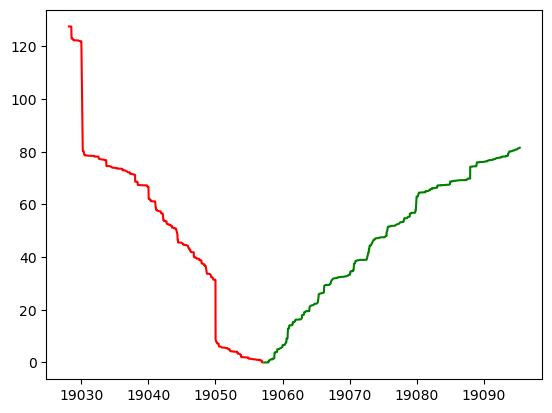

In [121]:
plt.plot(depth_df[depth_df["type"]=="bids"]["qty"].cumsum(), color="red")
plt.plot(depth_df[depth_df["type"]=="asks"]["qty"].cumsum(), color="green")
plt.show()

In [ ]:
trades = client.get_recent_trades(symbol='BTCBUSD')

In [125]:
trades_df = pd.DataFrame(trades).set_index('id').astype(
    {
        "price":"float", 
        "qty":"float", 
        "quoteQty":"float",
        "time":'datetime64[ms]',
        "isBuyerMaker":"bool",
        "isBestMatch": "bool"
    }
)
trades_df

,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
id,,,,,,
549153137,19050.71,0.00261,49.722353,2022-10-21 04:36:35.774,False,True
549153138,19050.71,0.00237,45.150183,2022-10-21 04:36:35.784,False,True
549153139,19050.72,0.00261,49.722379,2022-10-21 04:36:35.798,False,True
549153140,19050.73,0.33318,6347.322221,2022-10-21 04:36:35.832,False,True
549153141,19050.73,0.00838,159.645117,2022-10-21 04:36:36.213,False,True
...,...,...,...,...,...,...
549153632,19051.99,0.00503,95.831510,2022-10-21 04:37:08.091,False,True
549153633,19052.00,0.00209,39.818680,2022-10-21 04:37:08.092,False,True
549153634,19052.09,0.00524,99.832952,2022-10-21 04:37:08.092,False,True


In [29]:
client.get_historical_trades(symbol='BTCBUSD')

[{'id': 548948276,
  'price': '19035.86000000',
  'qty': '0.00180000',
  'quoteQty': '34.26454800',
  'time': 1666314503250,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 548948277,
  'price': '19035.91000000',
  'qty': '0.00340000',
  'quoteQty': '64.72209400',
  'time': 1666314503250,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 548948278,
  'price': '19035.92000000',
  'qty': '0.08736000',
  'quoteQty': '1662.97797120',
  'time': 1666314503250,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 548948279,
  'price': '19035.96000000',
  'qty': '0.03233000',
  'quoteQty': '615.43258680',
  'time': 1666314503250,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 548948280,
  'price': '19035.97000000',
  'qty': '0.12894000',
  'quoteQty': '2454.49797180',
  'time': 1666314503250,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 548948281,
  'price': '19035.97000000',
  'qty': '0.34928000',
  'quoteQty': '6648.88360160',
  'time': 1666314503251

In [62]:
pd.DataFrame(client.get_aggregate_trades(symbol='BTCBUSD'))

,a,p,q,f,l,T,m,M
0,1042766,19321.73000000,0.00104300,1045093,1045093,1665771076983,True,True
1,1042767,19321.73000000,0.03570400,1045094,1045094,1665771078023,True,True
2,1042768,19321.12000000,0.03933600,1045095,1045095,1665771078913,True,True
3,1042769,19321.09000000,0.00465900,1045096,1045096,1665771078913,True,True
4,1042770,19321.09000000,0.03105400,1045097,1045097,1665771078925,True,True
...,...,...,...,...,...,...,...,...
495,1043261,19283.54000000,0.00568600,1045588,1045588,1665771438278,True,True
496,1043262,19280.00000000,0.00256000,1045589,1045589,1665771438278,True,True
497,1043263,19278.80000000,0.00500000,1045590,1045590,1665771442067,False,True
498,1043264,19279.18000000,0.00100000,1045591,1045591,1665771687963,True,True


OHLCV values:
    * Open time, 
    * Open, 
    * High, 
    * Low, 
    * Close, 
    * Volume, 
    * Close time, 
    * Quote asset volume, 
    * Number of trades, 
    * Taker buy base asset volume, 
    * Taker buy quote asset volume, 
    * Ignore

In [191]:
headers = {
    "open_time": 'datetime64[ms]',
    "open": 'float64',
    "high": 'float64',
    "low": 'float64',
    "close": 'float64',
    "volume": 'float64',
    "close_time": 'datetime64[ms]',
    "quote_asset_volume": 'float64',
    "number_of_trades": 'int64',
    "taker_buy_base_asset_volume": 'float64',
    "taker_buy_quote_asset_volume": 'float64',
    "ignore": 'float64'
}
kline_df = pd.DataFrame(client.get_historical_klines("BTCBUSD", "1d"), columns=headers.keys())
# np.datetime64(kline_df["open_time"]//1000, "s")
# np.array(kline_df["open_time"], dtype='datetime64[ms]')
# kline_df.info()
kline_df

# kline_df.astype(dtype=list(headers.items()))

# pd.DataFrame(client.get_historical_klines("BTCBUSD", Client.KLINE_INTERVAL_1MINUTE), columns=headers)

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1664928000000,20035.61000000,22201.16000000,5000.00000000,20161.00000000,1365.39449000,1665014399999,27410424.33624035,72063,786.14955600,15778944.75784800,0
1,1665014400000,20161.96000000,20442.32000000,10000.00000000,19964.60000000,2540.08396100,1665100799999,51190507.47914717,130935,1417.84012400,28574698.16781103,0
2,1665100800000,19964.09000000,20055.71000000,19006.10000000,19531.67000000,2333.59461000,1665187199999,46114486.66229708,118082,1300.38775500,25693545.77569567,0
3,1665187200000,19531.85000000,19622.18000000,17538.59000000,19417.87000000,1777.60021200,1665273599999,34637579.10307583,91149,987.26152300,19236459.35032055,0
4,1665273600000,19417.87000000,22427.17000000,18500.00000000,19453.63000000,1820.53674300,1665359999999,35403698.23850188,89588,1010.87430600,19659533.12585289,0
5,1665360000000,19450.65000000,19523.21000000,19035.47000000,19142.27000000,2183.85052600,1665446399999,42183806.21697531,107720,1255.89644600,24257071.97348802,0
6,1665446400000,19142.27000000,19264.21000000,18863.00000000,19057.92000000,2368.26273300,1665532799999,45159914.74362216,114386,1366.25049500,26051546.68277343,0
7,1665532800000,19057.12000000,21768.23000000,10000.00000000,19155.07000000,2082.14753500,1665619199999,39799347.17037173,101921,1176.18934900,22481396.92981660,0
8,1665619200000,19154.18000000,21779.91000000,10000.00000000,19378.01000000,2473.94272500,1665705599999,46974185.00170372,119679,1468.24964600,27858532.26747358,0
9,1665705600000,19378.01000000,19944.69000000,10000.00000000,10000.00000000,2040.79532800,1665791999999,40013896.20911735,100123,1195.04147500,23431968.96452010,0


In [192]:
kline_df = kline_df.astype(dtype=headers)
kline_df = kline_df.set_index("open_time")
kline_df.index = kline_df.index.to_period()
kline_df

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
open_time,,,,,,,,,,,
2022-10-05,20035.61,22201.16,5000.00,20161.00,1365.394490,2022-10-05 23:59:59.999,2.741042e+07,72063,786.149556,1.577894e+07,0.0
2022-10-06,20161.96,20442.32,10000.00,19964.60,2540.083961,2022-10-06 23:59:59.999,5.119051e+07,130935,1417.840124,2.857470e+07,0.0
2022-10-07,19964.09,20055.71,19006.10,19531.67,2333.594610,2022-10-07 23:59:59.999,4.611449e+07,118082,1300.387755,2.569355e+07,0.0
2022-10-08,19531.85,19622.18,17538.59,19417.87,1777.600212,2022-10-08 23:59:59.999,3.463758e+07,91149,987.261523,1.923646e+07,0.0
2022-10-09,19417.87,22427.17,18500.00,19453.63,1820.536743,2022-10-09 23:59:59.999,3.540370e+07,89588,1010.874306,1.965953e+07,0.0
2022-10-10,19450.65,19523.21,19035.47,19142.27,2183.850526,2022-10-10 23:59:59.999,4.218381e+07,107720,1255.896446,2.425707e+07,0.0
2022-10-11,19142.27,19264.21,18863.00,19057.92,2368.262733,2022-10-11 23:59:59.999,4.515991e+07,114386,1366.250495,2.605155e+07,0.0
2022-10-12,19057.12,21768.23,10000.00,19155.07,2082.147535,2022-10-12 23:59:59.999,3.979935e+07,101921,1176.189349,2.248140e+07,0.0
2022-10-13,19154.18,21779.91,10000.00,19378.01,2473.942725,2022-10-13 23:59:59.999,4.697419e+07,119679,1468.249646,2.785853e+07,0.0


In [193]:
kline_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 11 entries, 2022-10-05 to 2022-10-15
Freq: D
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   open                          11 non-null     float64       
 1   high                          11 non-null     float64       
 2   low                           11 non-null     float64       
 3   close                         11 non-null     float64       
 4   volume                        11 non-null     float64       
 5   close_time                    11 non-null     datetime64[ns]
 6   quote_asset_volume            11 non-null     float64       
 7   number_of_trades              11 non-null     int64         
 8   taker_buy_base_asset_volume   11 non-null     float64       
 9   taker_buy_quote_asset_volume  11 non-null     float64       
 10  ignore                        11 non-null     float64       
dtypes: datet

<AxesSubplot:xlabel='open_time'>

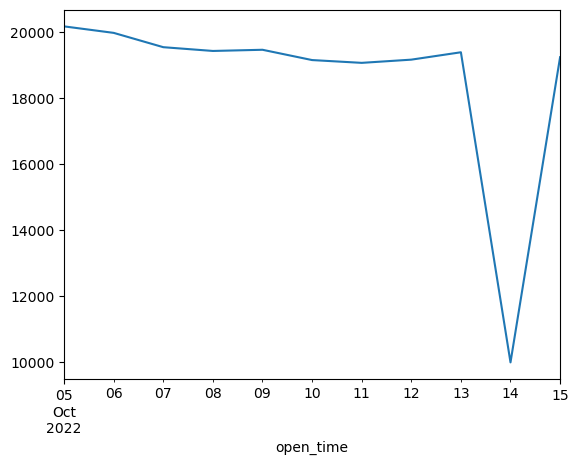

In [182]:
kline_df["close"].plot()

In [71]:
client.get_historical_klines?

Signature:
client.get_historical_klines(
    symbol,
    interval,
    start_str=None,
    end_str=None,
    limit=1000,
    klines_type: binance.enums.HistoricalKlinesType = <HistoricalKlinesType.SPOT: 1>,
)
Docstring:
Get Historical Klines from Binance

:param symbol: Name of symbol pair e.g BNBBTC
:type symbol: str
:param interval: Binance Kline interval
:type interval: str
:param start_str: optional - start date string in UTC format or timestamp in milliseconds
:type start_str: str|int
:param end_str: optional - end date string in UTC format or timestamp in milliseconds (default will fetch everything up to now)
:type end_str: str|int
:param limit: Default 1000; max 1000.
:type limit: int
:param klines_type: Historical klines type: SPOT or FUTURES
:type klines_type: HistoricalKlinesType

:return: list of OHLCV values (Open time, Open, High, Low, Close, Volume, Close time, Quote asset volume, Number of trades, Taker buy base asset volume, Taker buy quote asset volume, Ignore)
File:  

In [74]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to 

In [89]:
datetime.fromtimestamp(1664928000000/1000)

datetime.datetime(2022, 10, 4, 21, 0)

In [128]:
headers = {
    "open_time": 'datetime64[ms]',
    "open": 'float64',
    "high": 'float64',
    "low": 'float64',
    "close": 'float64',
    "volume": 'float64',
    "close_time": 'datetime64[ms]',
    "quote_asset_volume": 'float64',
    "number_of_trades": 'int64',
    "taker_buy_base_asset_volume": 'float64',
    "taker_buy_quote_asset_volume": 'float64',
    "ignore": 'float64'
}
list(headers.items())

[('open_time', 'datetime64[ms]'),
 ('open', 'float64'),
 ('high', 'float64'),
 ('low', 'float64'),
 ('close', 'float64'),
 ('volume', 'float64'),
 ('close_time', 'datetime64[ms]'),
 ('quote_asset_volume', 'float64'),
 ('number_of_trades', 'int64'),
 ('taker_buy_base_asset_volume', 'float64'),
 ('taker_buy_quote_asset_volume', 'float64'),
 ('ignore', 'float64')]

In [165]:
pd.to_datetime?

Signature:
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible',
    errors: 'str' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool | None' = None,
    format: 'str | None' = None,
    exact: 'bool' = True,
    unit: 'str | None' = None,
    infer_datetime_format: 'bool' = False,
    origin='unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
Docstring:
Convert argument to datetime.

This function converts a scalar, array-like, :class:`Series` or
:class:`DataFrame`/dict-like to a pandas datetime object.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
    The object to convert to a datetime. If a :class:`DataFrame` is provided, the
    method expects minimally the following columns: :const:`"year"`,
    :const:`"month"`, :const:`"day"`.
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If :const:`'raise'`, then invalid parsing 